# Importing necessary libraries for data analysis, optimization, forecasting, and machine learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

## Loading data from CSV file and displaying the first few rows and all the columns of the dataset to understand its structure

In [3]:
data = pd.read_csv('Charging station_A_Calif.csv')

print(data.head())
print(data.shape)
data.columns

       Date     Time  EV Charging Demand (kW)  Solar Energy Production (kW)  \
0  1/1/2021  0:00:00                 0.112362                      0.125388   
1  1/1/2021  1:00:00                 0.285214                      0.052697   
2  1/1/2021  2:00:00                 0.219598                      0.105035   
3  1/1/2021  3:00:00                 0.179598                      0.073839   
4  1/1/2021  4:00:00                 0.046806                      0.068614   

   Wind Energy Production (kW)  Electricity Price ($/kWh) Grid Availability  \
0                     0.009105                   0.137310         Available   
1                     0.107589                   0.125105         Available   
2                     0.043996                   0.106661         Available   
3                     0.275727                   0.072209         Available   
4                     0.059824                   0.091090         Available   

  Weather Conditions  Battery Storage (kWh)  Charg

Index(['Date', 'Time', 'EV Charging Demand (kW)',
       'Solar Energy Production (kW)', 'Wind Energy Production (kW)',
       'Electricity Price ($/kWh)', 'Grid Availability', 'Weather Conditions',
       'Battery Storage (kWh)', 'Charging Station Capacity (kW)',
       'EV Charging Efficiency (%)', 'Number of EVs Charging',
       'Peak Demand (kW)', 'Renewable Energy Usage (%)',
       'Grid Stability Index', 'Carbon Emissions (kgCO2/kWh)',
       'Power Outages (hours)', 'Energy Savings ($)',
       'Total Renewable Energy Production (kW)',
       'Effective Charging Capacity (kW)', 'Adjusted Charging Demand (kW)',
       'Net Energy Cost ($)', 'Carbon Footprint Reduction (kgCO2)',
       'Renewable Energy Efficiency'],
      dtype='object')

In [6]:
pip install graphviz matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Enhanced Optimization Framework with Inputs', format='png')
dot.attr(rankdir='TB', size='8,10')

# Set the color and style for grouping related stages
dot.attr('node', shape='ellipse', style='filled', color='#A0C3D2')  # Light blue for start and end
dot.node('A', 'Start')
dot.node('J', 'End')

# Input Data Expansion
dot.attr('node', shape='parallelogram', style='filled', color='#F3E0DC')  # Light peach for input stages
dot.node('B', 'Input Data: Renewable Energy, EV Demand, Battery Storage, Pricing')
dot.node('C', 'Predictive Modeling (Machine Learning & Time Series Forecasts)')

# Defining Mathematical Model
dot.attr('node', shape='box', style='filled', color='#C4E1E1')  # Light teal for process steps
dot.node('D', 'Define Mathematical Optimization Model')
dot.node('E', 'Define Objective, Decision Variables, and Constraints')

# Optimization Process
dot.node('F', 'Run Different Optimization Models (Differential Evolution, SLSQP, etc.)')
dot.node('G', 'Evaluate Optimization Results')

# Results Evaluation
dot.node('H', 'Comparison of Before and After Optimization')
dot.node('I', 'Unmet Demand for Next 24 Hours')
dot.node('K', 'Renewable Energy Usage for Next 24 Hours')
dot.node('L', 'Battery Usage and Grid Stability for Next 24 Hours')

# Connect nodes to represent the flow of the process
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'HK', 'HL', 'LJ'])

# Render the flowchart and save it to a file
dot.render('enhanced_optimization_with_inputs_flowchart', view=True)


'enhanced_optimization_with_inputs_flowchart.png'

## Step 1: Data Cleaning and Preprocessing 

In [6]:
# Handling missing values and removing duplicates to clean the dataset
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Converting the 'Date' column to datetime format and setting it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

## Step 2: Feature Engineering for Time Series Modeling Create Lag Features

In [8]:
# Creating lag features for EV Charging Demand to capture temporal dependencies
data['lag_1'] = data['EV Charging Demand (kW)'].shift(1)
data['lag_24'] = data['EV Charging Demand (kW)'].shift(24)  # One-day lag

# Dropping rows with NaN values resulting from lagging to ensure data integrity
data.dropna(inplace=True)

# Selecting features and target for modeling

In [10]:
features = data[['lag_1', 'lag_24', 'Solar Energy Production (kW)', 'Wind Energy Production (kW)', 'Battery Storage (kWh)']]
target = data['EV Charging Demand (kW)']

## Step 3: ARIMA and SARIMA Models for Solar and Wind Energy Production
### We will first train ARIMA for both solar and wind, then SARIMA for both, and compare them to select the best model.

## Step 3.1: ARIMA for Solar Energy
### Check Stationarity and Train ARIMA for Solar:

In [13]:
# Checking stationarity of solar energy production data using Augmented Dickey-Fuller test
result = adfuller(data['Solar Energy Production (kW)'])
print(f"Solar Energy ADF Statistic: {result[0]}, p-value: {result[1]}")

# Training an ARIMA model for solar energy production if data is stationary (adjust p, d, q based on analysis)
arima_solar = ARIMA(data['Solar Energy Production (kW)'], order=(5,1,0))
arima_solar_fit = arima_solar.fit()

# Forecasting solar energy production for the next 24 hours
solar_forecast_arima = arima_solar_fit.forecast(steps=24)

Solar Energy ADF Statistic: -172.47747880797834, p-value: 0.0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Step 3.2: ARIMA for Wind Energy
### Check Stationarity and Train ARIMA for Wind:

In [15]:
# Checking stationarity of wind energy production data using Augmented Dickey-Fuller test
result = adfuller(data['Wind Energy Production (kW)'])
print(f"Wind Energy ADF Statistic: {result[0]}, p-value: {result[1]}")

# Training an ARIMA model for wind energy production
arima_wind = ARIMA(data['Wind Energy Production (kW)'], order=(5,1,0))
arima_wind_fit = arima_wind.fit()

# Forecasting wind energy production for the next 24 hours
wind_forecast_arima = arima_wind_fit.forecast(steps=24)

Wind Energy ADF Statistic: -174.4513277200133, p-value: 0.0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Step 3.3: SARIMA for Solar Energy
### Train SARIMA for Solar

In [17]:
# Training SARIMA model for solar energy production to account for seasonality
sarima_solar = SARIMAX(data['Solar Energy Production (kW)'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_solar_fit = sarima_solar.fit()

# Forecasting solar energy production for the next 24 hours using SARIMA
solar_forecast_sarima = sarima_solar_fit.forecast(steps=24)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.69341D-01    |proj g|=  2.95153D+00

At iterate    5    f= -8.27856D-01    |proj g|=  1.78649D-01

At iterate   10    f= -8.72497D-01    |proj g|=  2.99623D-01

At iterate   15    f= -8.86871D-01    |proj g|=  1.38909D+00

At iterate   20    f= -9.49161D-01    |proj g|=  1.76484D-01

At iterate   25    f= -1.00097D+00    |proj g|=  2.72332D-01

At iterate   30    f= -1.02007D+00    |proj g|=  3.01993D-01

At iterate   35    f= -1.02364D+00    |proj g|=  1.04161D-01

At iterate   40    f= -1.02434D+00    |proj g|=  1.29831D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Step 3.4: SARIMA for Wind Energy
### Train SARIMA for Wind:

In [19]:
# Training SARIMA model for wind energy production to account for seasonality
sarima_wind = SARIMAX(data['Wind Energy Production (kW)'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_wind_fit = sarima_wind.fit()

# Forecasting wind energy production for the next 24 hours using SARIMA
wind_forecast_sarima = sarima_wind_fit.forecast(steps=24)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.75815D-01    |proj g|=  2.92824D+00

At iterate    5    f= -8.31887D-01    |proj g|=  1.94752D-01

At iterate   10    f= -8.73412D-01    |proj g|=  5.15397D-01

At iterate   15    f= -8.88041D-01    |proj g|=  1.41618D+00

At iterate   20    f= -9.81105D-01    |proj g|=  1.34554D+00

At iterate   25    f= -1.01610D+00    |proj g|=  3.10401D-01

At iterate   30    f= -1.02459D+00    |proj g|=  1.51576D-02

At iterate   35    f= -1.02603D+00    |proj g|=  1.74224D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Step 3.5: Compare ARIMA and SARIMA Models for Best Fit
### Evaluate and Compare Models Using RMSE

In [21]:
# Comparing Solar Energy Models using Mean Squared Error (MSE)
mse_arima_solar = mean_squared_error(data['Solar Energy Production (kW)'][-24:], solar_forecast_arima)
mse_sarima_solar = mean_squared_error(data['Solar Energy Production (kW)'][-24:], solar_forecast_sarima)

print(f"Solar ARIMA MSE: {mse_arima_solar}, Solar SARIMA MSE: {mse_sarima_solar}")

# Comparing Wind Energy Models using Mean Squared Error (MSE)
mse_arima_wind = mean_squared_error(data['Wind Energy Production (kW)'][-24:], wind_forecast_arima)
mse_sarima_wind = mean_squared_error(data['Wind Energy Production (kW)'][-24:], wind_forecast_sarima)

print(f"Wind ARIMA MSE: {mse_arima_wind}, Wind SARIMA MSE: {mse_sarima_wind}")

# Selecting the best models based on MSE values
best_model_solar = 'SARIMA' if mse_sarima_solar < mse_arima_solar else 'ARIMA'
best_model_wind = 'SARIMA' if mse_sarima_wind < mse_arima_wind else 'ARIMA'

Solar ARIMA MSE: 0.011460772096260776, Solar SARIMA MSE: 0.006811198901037048
Wind ARIMA MSE: 0.010937842358081944, Wind SARIMA MSE: 0.008817374866539876


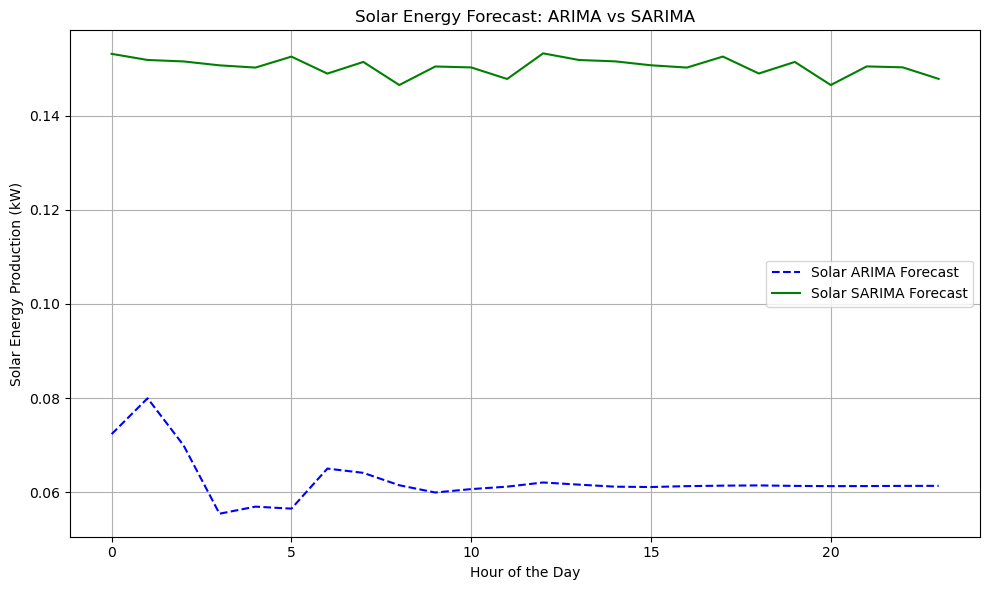

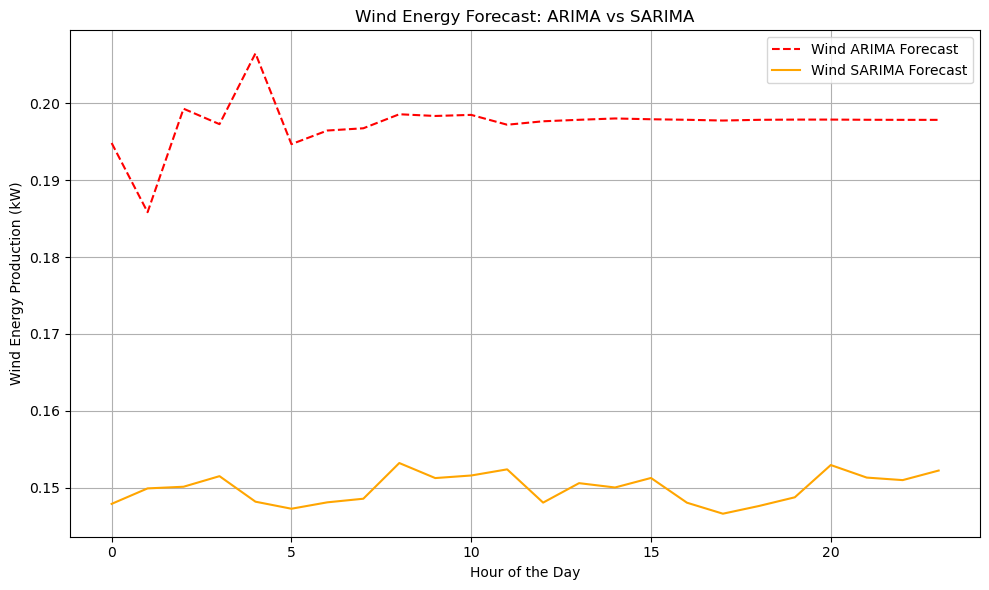

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming solar_forecast_arima, wind_forecast_arima, solar_forecast_sarima, wind_forecast_sarima are available

# Timepoints for next 24 hours
timepoints = range(24)

# Plotting ARIMA vs SARIMA for Solar Energy
plt.figure(figsize=(10, 6))
plt.plot(timepoints, solar_forecast_arima, label='Solar ARIMA Forecast', linestyle='--', color='blue')
plt.plot(timepoints, solar_forecast_sarima, label='Solar SARIMA Forecast', linestyle='-', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Solar Energy Production (kW)')
plt.title('Solar Energy Forecast: ARIMA vs SARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting ARIMA vs SARIMA for Wind Energy
plt.figure(figsize=(10, 6))
plt.plot(timepoints, wind_forecast_arima, label='Wind ARIMA Forecast', linestyle='--', color='red')
plt.plot(timepoints, wind_forecast_sarima, label='Wind SARIMA Forecast', linestyle='-', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Wind Energy Production (kW)')
plt.title('Wind Energy Forecast: ARIMA vs SARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 4: Predict EV Demand and Battery Storage
### Step 4.1: EV Demand Prediction Using Multiple Models
#### Define Features and Target for EV Demand Prediction

In [24]:
# Selecting features and target variables for machine learning modeling
X = data[['Solar Energy Production (kW)', 'Wind Energy Production (kW)', 'Electricity Price ($/kWh)', 
        'Effective Charging Capacity (kW)', 'Adjusted Charging Demand (kW)', 'Battery Storage (kWh)', 
        'Renewable Energy Usage (%)', 'Grid Stability Index',
        'lag_1', 'lag_24']]

y = data['EV Charging Demand (kW)']  # Target variable

In [25]:
# Splitting data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and Evaluate Multiple Models:

### Train models such as Random Forest, Gradient Boosting, and Linear Regression to predict EV charging demand.

In [27]:
# Defining models for regression analysis to predict EV charging demand
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LinearRegression': LinearRegression()
}

results = {}

# Training each model and evaluating its performance on the test set using Mean Squared Error (MSE)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse
    print(f"{model_name} MSE: {mse}")

# Selecting the best model based on the lowest MSE
best_model_name = min(results, key=results.get)
best_model_ev_demand = models[best_model_name]
ev_demand_forecast = best_model_ev_demand.predict(X_test)  # Prediction for the test set

print(f"Best Model for EV Charging Demand: {best_model_name}")

RandomForest MSE: 9.95571601559969e-06
GradientBoosting MSE: 0.00013217881059780144
LinearRegression MSE: 0.0018504681272172737
Best Model for EV Charging Demand: RandomForest


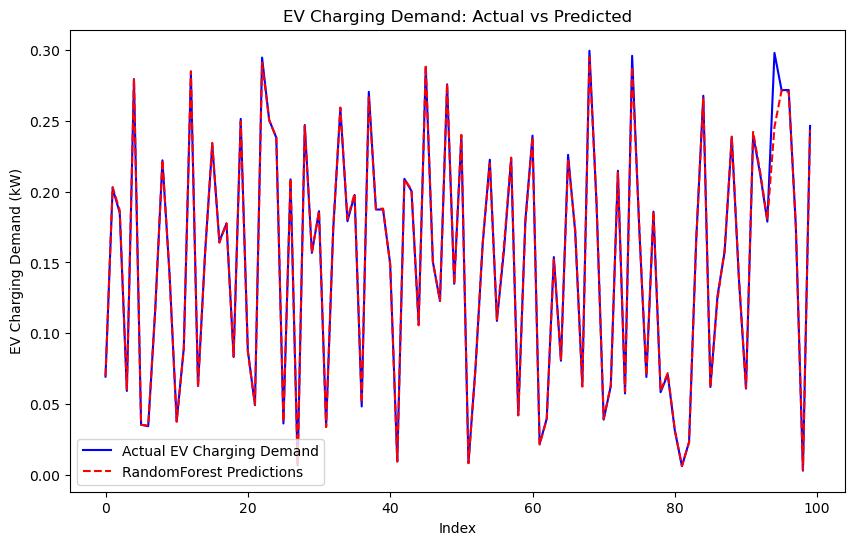

<Figure size 640x480 with 0 Axes>

In [28]:
# Visualization: EV Charging Demand Prediction Performance
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual EV Charging Demand', color='blue')
plt.plot(ev_demand_forecast[:100], label=f'{best_model_name} Predictions', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('EV Charging Demand (kW)')
plt.title('EV Charging Demand: Actual vs Predicted')
plt.legend()
plt.show()
plt.savefig('ev_charging_demnand.png')

In [29]:
print(X_test.shape)

(5973, 10)


## Step 4.2: Predict Battery Storage Using Time Series Models
### Battery storage is typically predicted using time series models like ARIMA or SARIMA. Since we are forecasting future values, we treat it as a time series problem.

### Train and Evaluate ARIMA/SARIMA for Battery Storage:
### Predict battery storage based on historical data.

In [31]:
# Training ARIMA model for battery storage to forecast energy usage
arima_battery = ARIMA(data['Battery Storage (kWh)'], order=(5,1,0))
arima_battery_fit = arima_battery.fit()
battery_forecast_arima = arima_battery_fit.forecast(steps=24)

# Training SARIMA model for battery storage to account for seasonality in data
sarima_battery = SARIMAX(data['Battery Storage (kWh)'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_battery_fit = sarima_battery.fit()
battery_forecast_sarima = sarima_battery_fit.forecast(steps=24)

# Evaluating both ARIMA and SARIMA models using Mean Squared Error (MSE) to determine accuracy
mse_arima_battery = mean_squared_error(data['Battery Storage (kWh)'][-24:], battery_forecast_arima)
mse_sarima_battery = mean_squared_error(data['Battery Storage (kWh)'][-24:], battery_forecast_sarima)

# Selecting the best model for battery storage forecasting based on lower MSE value
best_battery_model = 'SARIMA' if mse_sarima_battery < mse_arima_battery else 'ARIMA'
battery_forecast = battery_forecast_sarima if best_battery_model == 'SARIMA' else battery_forecast_arima
print(f"Best Model for Battery Storage: {best_battery_model}")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.34403D+00    |proj g|=  7.77813D-02

At iterate    5    f=  4.23207D+00    |proj g|=  3.10013D-02

At iterate   10    f=  4.09328D+00    |proj g|=  1.40996D-02

At iterate   15    f=  4.09091D+00    |proj g|=  1.11156D-02

At iterate   20    f=  4.08772D+00    |proj g|=  4.08394D-03
  ys=-2.041E-03  -gs= 1.364E-04 BFGS update SKIPPED

At iterate   25    f=  4.08756D+00    |proj g|=  3.61123D-03

At iterate   30    f=  4.08755D+00    |proj g|=  9.28191D-04
  ys=-1.204E-05  -gs= 4.480E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


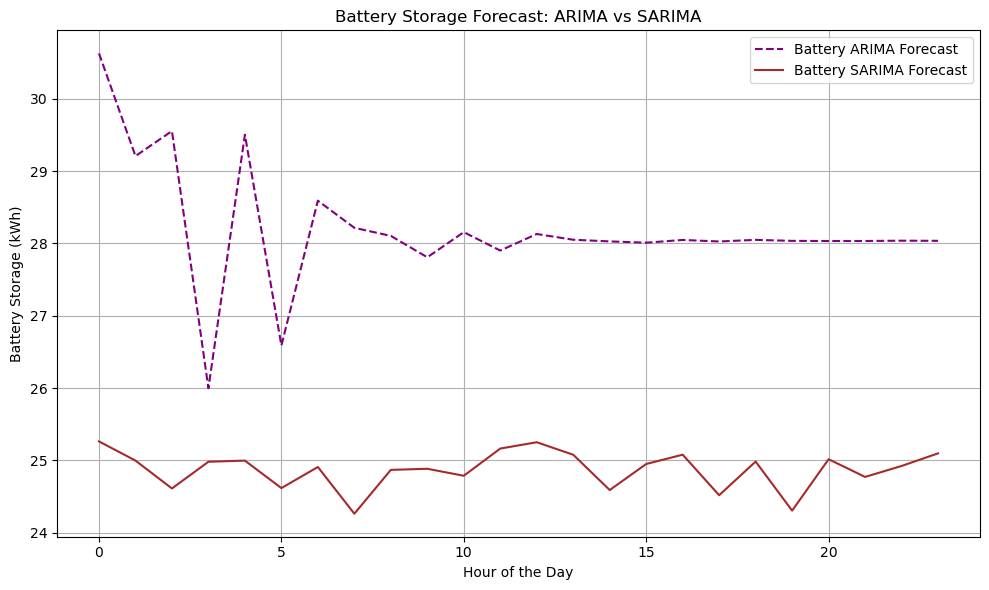

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt

# Timepoints for next 24 hours
timepoints = range(24)

# Plotting ARIMA vs SARIMA for Battery Storage
plt.figure(figsize=(10, 6))
plt.plot(timepoints, battery_forecast_arima, label='Battery ARIMA Forecast', linestyle='--', color='purple')
plt.plot(timepoints, battery_forecast_sarima, label='Battery SARIMA Forecast', linestyle='-', color='brown')
plt.xlabel('Hour of the Day')
plt.ylabel('Battery Storage (kWh)')
plt.title('Battery Storage Forecast: ARIMA vs SARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('Battery Storage Forecast: ARIMA vs SARIMA') 

In [33]:
# Solar and Wind forecasts based on the best models chosen previously
solar_forecast = solar_forecast_sarima if best_model_solar == 'SARIMA' else solar_forecast_arima
wind_forecast = wind_forecast_sarima if best_model_wind == 'SARIMA' else wind_forecast_arima

# Battery storage forecast from the best model (ARIMA or SARIMA)
battery_forecast = battery_forecast_sarima if best_battery_model == 'SARIMA' else battery_forecast_arima
# Combining solar and wind forecasts to get total renewable energy forecast
renewable_forecast = solar_forecast + wind_forecast  

# EV demand forecast from the best model (e.g., RandomForest, GradientBoosting, etc.)
# This would be something like:
ev_demand_forecast = best_model_ev_demand.predict(X_test)

len(renewable_forecast), len(battery_forecast), len(ev_demand_forecast)

(24, 24, 5973)

## Defining Grid Stability Index using historical data


In [35]:
# # Loading Grid Stability Index from Historical Data
# # Computing the acceptable threshold (10th percentile)
# # Ensuring it's a NumPy array with no missing values
grid_stability_index = data['Grid Stability Index'].dropna().values  

# # Calculating the acceptable threshold based on the 10th percentile of the historical data
acceptable_threshold = np.percentile(grid_stability_index, 10)  # Calculate 10th percentile

# # Printing the acceptable threshold value
print("Calculated acceptable threshold for grid stability:", acceptable_threshold)

# Converting forecasts to NumPy arrays if needed
renewable_forecast = np.array(renewable_forecast)
battery_forecast = np.array(battery_forecast)
ev_demand_forecast = np.array(ev_demand_forecast)

Calculated acceptable threshold for grid stability: 0.5982647188


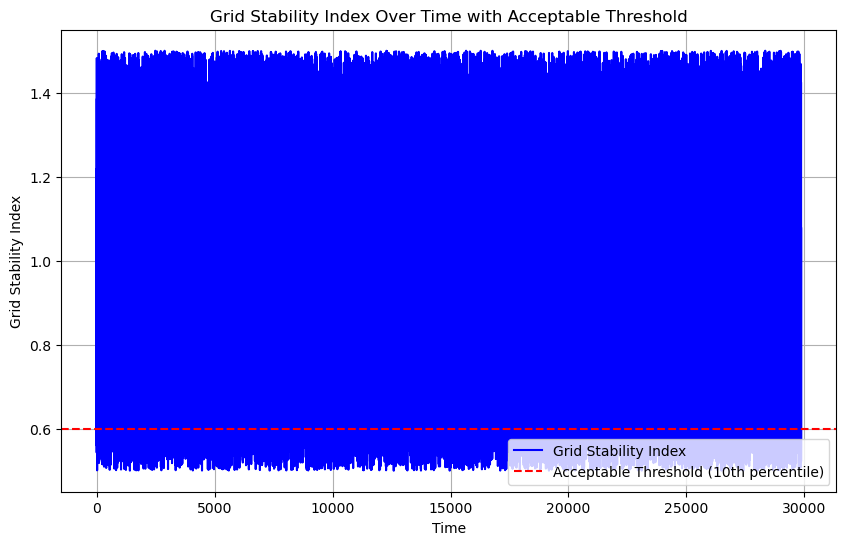

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(grid_stability_index, color='blue', label='Grid Stability Index')
plt.axhline(y=acceptable_threshold, color='red', linestyle='--', label='Acceptable Threshold (10th percentile)')
plt.xlabel('Time')
plt.ylabel('Grid Stability Index')
plt.title('Grid Stability Index Over Time with Acceptable Threshold')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("Grid Stability Index Over Time with Acceptable Threshold")

## Forecasting of electricity price

Random Forest MSE: 6.622715408895899e-06
Linear Regression MSE: 0.00045837946799122224
Gradient Boosting MSE: 4.6562239276863594e-05
Best Model: Random Forest with MSE: 6.622715408895899e-06
Random Forest MSE on entire dataset: 9.192789477169144e-07


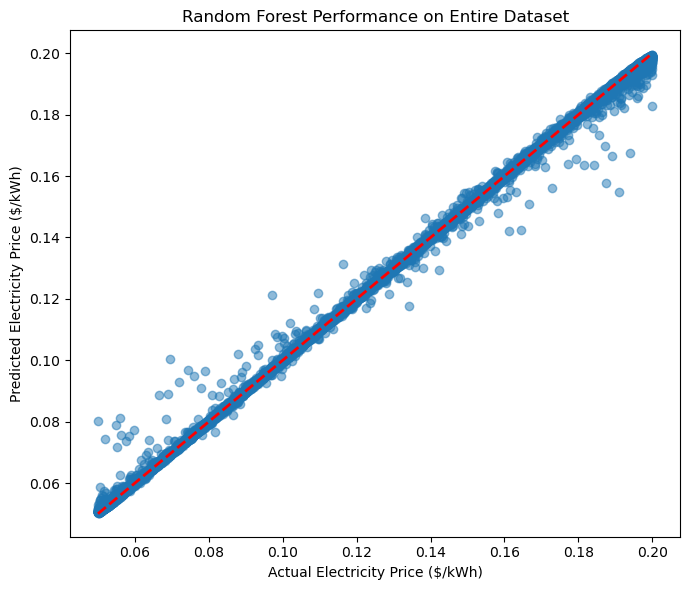

Electricity Price Forecast:
[0.18678815 0.08326729 0.09683482 ... 0.17731152 0.17083925 0.10696174]


<Figure size 640x480 with 0 Axes>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Check if 'Date' and 'Time' columns exist before proceeding
if 'Date' in data.columns and 'Time' in data.columns:
    # Convert 'Date' and 'Time' columns into a datetime feature
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')
    data['Hour'] = data['Datetime'].dt.hour
    data['DayOfWeek'] = data['Datetime'].dt.dayofweek

    # Drop unnecessary columns
    data.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)

# Update categorical columns to only include those that exist in the dataset
categorical_cols = [col for col in ['Grid Availability', 'Weather Conditions'] if col in data.columns]

# One-hot encode categorical columns if they exist
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Handling missing values by filling them with the median value of each numeric column
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Ensure all features are numeric and handle non-numeric columns
X = data.drop(['Electricity Price ($/kWh)'], axis=1)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
y = data['Electricity Price ($/kWh)']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate different models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

best_model_name = None
best_model = None
best_mse = float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} MSE: {mse}")
    if mse < best_mse:
        best_mse = mse
        best_model_name = name
        best_model = model

print(f"Best Model: {best_model_name} with MSE: {best_mse}")

# Train the best model on the entire dataset
best_model.fit(X, y)

# Predict on the entire dataset
predictions = best_model.predict(X)

# Evaluate the best model on the entire dataset
mse_entire = mean_squared_error(y, predictions)
print(f"{best_model_name} MSE on entire dataset: {mse_entire}")

# Visualize model performance on the entire dataset
plt.figure(figsize=(7, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Electricity Price ($/kWh)')
plt.ylabel('Predicted Electricity Price ($/kWh)')
plt.title(f'{best_model_name} Performance on Entire Dataset')
plt.tight_layout()
plt.show()
plt.savefig("Random Forest performance on the entire dataset")

# Forecast electricity price for the next 24 hours using the entire dataset
electricity_price = np.array(predictions)
print("Electricity Price Forecast:")
print(electricity_price)

## Forecasts and Optimization:



In [40]:
renewable_forecast = renewable_forecast.tolist() if isinstance(renewable_forecast, pd.Series) else renewable_forecast
battery_forecast = battery_forecast.tolist() if isinstance(battery_forecast, pd.Series) else battery_forecast
ev_demand_forecast = ev_demand_forecast.tolist() if isinstance(ev_demand_forecast, pd.Series) else ev_demand_forecast

In [41]:
# Convert all forecast arrays to NumPy arrays
renewable_forecast = np.array(renewable_forecast)
battery_forecast = np.array(battery_forecast)
ev_demand_forecast = np.array(ev_demand_forecast)

# Extracting the next 24 hours for optimization and ensuring correct format
electricity_price_forecast_24h = np.array(electricity_price[-24:])
ev_demand_forecast_24h = np.array(ev_demand_forecast[-24:])
renewable_energy_forecast_24h = np.array(renewable_forecast[-24:])
battery_forecast_24h = np.array(battery_forecast[-24:])
grid_stability_index_forecast_24h = np.array(grid_stability_index[-24:])

# Print the type of each forecast array to verify they are all NumPy arrays
print("Types after conversion:")
print("Electricity Price:", type(electricity_price_forecast_24h))
print("EV Demand Forecast:", type(ev_demand_forecast_24h))
print("Renewable Energy Forecast:", type(renewable_energy_forecast_24h))
print("Battery Forecast:", type(battery_forecast_24h))
print("Grid Stability Index:", type(grid_stability_index_forecast_24h))


Types after conversion:
Electricity Price: <class 'numpy.ndarray'>
EV Demand Forecast: <class 'numpy.ndarray'>
Renewable Energy Forecast: <class 'numpy.ndarray'>
Battery Forecast: <class 'numpy.ndarray'>
Grid Stability Index: <class 'numpy.ndarray'>


## Optimization Setup with Pricing Variables


"""Objective
The objective of the optimization is to maximize the total revenue from electric vehicle (EV) charging stations by determining the optimal energy allocation over the next 24 hours. The optimization also aims to promote renewable energy usage and ensure grid stability, while minimizing unmet demand.

The main goal is to find the best balance between revenue generation and energy distribution, while adhering to specific constraints. To achieve this, the model uses an objective function that includes the following components:
- **Revenue**: Maximize the revenue obtained from EV charging, based on forecasted electricity prices and energy allocation.
- **Unmet Demand Penalty**: Minimize the unmet demand by adding a penalty, which discourages not meeting the energy demand.
- **Renewable Usage Incentive**: Promote the use of renewable energy by adding an incentive for using solar and wind energy sources.
- **Low Price Incentive**: Encourage energy allocation when electricity prices are low.
- **Grid Stability Penalty**: Penalize scenarios where grid stability falls below the acceptable threshold, to ensure reliable energy distribution.

#### **Decision Variables**
The decision variable for the optimization is the **energy allocation** (“Ct”) for each of the next 24 hours, which indicates how much energy should be allocated to meet the EV charging demand.

#### **Constraints**
To ensure feasible and practical solutions, several constraints are applied to the optimization process:

1. **Supply-Demand Balance Constraint**: Ensures that the total energy allocated must meet the overall demand. The model should balance the energy supplied from renewable sources, battery storage, and other available resources to match the EV charging requirements.

2. **Demand Constraint**: Ensures that the energy allocation for each time step does not exceed the forecasted demand, which helps maintain a practical energy usage level and prevents over-allocation.

3. **Grid Stability Constraint**: Ensures that grid stability remains above a specified threshold for each hour, which is crucial for maintaining a reliable and stable energy supply during EV charging.

4. **Unmet Demand Constraint**: Ensures that the unmet demand remains below **0.1 kWh** for each hour. This helps guarantee that the energy allocation closely matches the EV charging demand and minimizes customer dissatisfaction.

#### **Optimization Approach**
The optimization approach involves two main steps:

1. **Global Optimization**: Uses the **differential evolution** method to find a good starting point for energy allocation that avoids local minima. This method is particularly effective for complex and non-convex problems.

2. **Local Optimization**: Refines the solution found in the global optimization phase using the **Sequential Least Squares Programming (SLSQP)** method. This method allows for the application of constraints and provides a more precise, locally optimized energy allocation.

#### **Optimization Results**
The optimization results include the following metrics:

- **Optimized Energy Allocation**: The allocation of energy for each of the next 24 hours, which maximizes revenue while meeting constraints.
- **Total Revenue After Optimization**: The total revenue achieved from EV charging after applying the optimized energy allocation strategy.
- **Total Renewable Energy Usage After Optimization**: The amount of renewable energy (solar and wind) used to meet the charging demand after optimization.
- **Total Battery Usage After Optimization**: The energy drawn from battery storage to meet the EV charging demand.

#### **Financial Impact**
The financial impact of the optimization is calculated by comparing the **total revenue before and after optimization**. The difference in revenue highlights the effectiveness of the optimized energy allocation in increasing profitability for the EV charging station.

#### **Environmental Impact**
The environmental impact of the optimization is assessed by comparing the **total renewable energy usage before and after optimization**. An increase in renewable energy usage signifies a positive environmental impact, as it reduces the reliance on non-renewable energy sources.

#### **Key Insights**
- The optimization successfully maximizes revenue by taking advantage of electricity price variations, incentivizing renewable energy use, and reducing unmet demand.
- The unmet demand is minimized, thereby improving customer satisfaction and ensuring reliable EV charging services.
- By promoting renewable energy usage, the optimization also contributes positively to environmental sustainability."""

In [43]:
import numpy as np
from scipy.optimize import minimize, differential_evolution
import matplotlib.pyplot as plt

# Adjusted weights for penalties and incentives
UNMET_DEMAND_PENALTY = 5000  # Significantly increased to reduce unmet demand
RENEWABLE_USAGE_INCENTIVE = 1200
LOW_PRICE_INCENTIVE = 500
GRID_STABILITY_PENALTY = 700

# Define the objective function with adjusted penalties and incentives
def objective_function(energy_allocation):
    revenue = np.sum(electricity_price_forecast_24h * energy_allocation)
    unmet_demand = np.maximum(ev_demand_forecast_24h - energy_allocation, 0)
    penalty_unmet_demand = np.sum(unmet_demand ** 2) * UNMET_DEMAND_PENALTY
    incentive_low_price = np.sum((electricity_price_forecast_24h < 0.15) * energy_allocation) * LOW_PRICE_INCENTIVE
    renewable_usage = np.sum(np.minimum(energy_allocation, renewable_energy_forecast_24h)) * RENEWABLE_USAGE_INCENTIVE
    grid_stability_penalty = np.sum(np.maximum(acceptable_threshold - grid_stability_index_forecast_24h, 0)) * GRID_STABILITY_PENALTY

    return -(revenue + renewable_usage + incentive_low_price - penalty_unmet_demand - grid_stability_penalty)

# Updated bounds to account for practical battery and renewable energy limits
bounds = [(0, min(demand, renewable + battery)) for demand, renewable, battery in zip(ev_demand_forecast_24h, renewable_energy_forecast_24h, battery_forecast_24h)]

# Using a global optimizer to avoid local minima (without non-bound constraints)
result_global = differential_evolution(objective_function, bounds=bounds, strategy='best1bin', seed=42)

# Use the global optimizer result as a starting point for local optimization with constraints
# Define unmet demand constraint to ensure it stays below a threshold for each hour
def unmet_demand_constraint_per_hour(energy_allocation, t):
    unmet_demand = ev_demand_forecast_24h[t] - energy_allocation[t]
    return 0.1 - unmet_demand  # Ensure unmet demand is limited per hour

def supply_demand_balance_constraint(energy_allocation):
    # This could be a function that ensures total supply matches demand
    total_supply = np.sum(energy_allocation)
    total_demand = np.sum(ev_demand_forecast_24h)
    return total_supply - total_demand

def demand_constraint(energy_allocation):
    # This function might ensure energy allocation does not exceed the demand
    return ev_demand_forecast_24h - energy_allocation

def grid_stability_constraint(energy_allocation):
    # This function ensures grid stability stays above an acceptable threshold
    return grid_stability_index_forecast_24h - acceptable_threshold

# Constraints in a form suitable for 'minimize'
constraints = [
    {'type': 'ineq', 'fun': supply_demand_balance_constraint},
    {'type': 'ineq', 'fun': demand_constraint},
    {'type': 'ineq', 'fun': grid_stability_constraint},
]

# Apply the unmet demand constraint for each hour
total_hours = len(ev_demand_forecast_24h)
for t in range(total_hours):
    constraints.append({'type': 'ineq', 'fun': unmet_demand_constraint_per_hour, 'args': (t,)})

# Improved initial guess closer to demand
initial_guess = ev_demand_forecast_24h.copy()

# Use local optimizer with constraints to refine the solution, switching to 'SLSQP' method
result = minimize(objective_function, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

# Extract the optimized results
optimized_energy_allocation = result.x

# Calculating total revenue based on the optimized allocation
total_revenue = -result.fun

# Calculate renewable energy usage after optimization
renewable_usage_after = np.minimum(optimized_energy_allocation, renewable_energy_forecast_24h)
total_renewable_usage_after = np.sum(renewable_usage_after)

# Calculate battery usage after optimization
battery_usage_after = np.maximum(optimized_energy_allocation - renewable_energy_forecast_24h, 0)
total_battery_usage_after = np.sum(battery_usage_after)

# Print the results
print("Optimized Energy Allocation for Next 24 Hours:", optimized_energy_allocation)
print("Total Revenue from EV Charging for Next 24 Hours:", total_revenue)
print("Total Renewable Energy Usage After Optimization:", total_renewable_usage_after)
print("Total Battery Usage After Optimization:", total_battery_usage_after)
for hour in range(24):
    print(f"Hour {hour + 1}: Electricity Price: ${electricity_price_forecast_24h[hour]:.2f} per kWh")

# Comparison Visualization
plt.figure(figsize=(10, 6))

# Extract the last 24 hours from the original dataset for comparison
ev_demand_last_24h = np.array(data['EV Charging Demand (kW)'][-24:])
renewable_energy_last_24h = np.array(data['Solar Energy Production (kW)'][-24:] + data['Wind Energy Production (kW)'][-24:])
battery_last_24h = np.array(data['Battery Storage (kWh)'][-24:])
electricity_price_last_24h = np.array(data['Electricity Price ($/kWh)'][-24:])
grid_stability_index_last_24h = np.array(data['Grid Stability Index'][-24:])

# Calculate unmet demand before optimization
unmet_demand_before_optimization = np.maximum(ev_demand_last_24h - renewable_energy_last_24h - battery_last_24h, 0)

# Calculate renewable energy usage before optimization
renewable_usage_before_optimization = np.minimum(ev_demand_last_24h, renewable_energy_last_24h)
total_renewable_usage_before = np.sum(renewable_usage_before_optimization)

# Calculate total revenue before optimization
revenue_before_optimization = np.sum(electricity_price_last_24h * ev_demand_last_24h)

# Unmet demand after optimization (calculated during the optimization)
unmet_demand_after_optimization = np.maximum(ev_demand_forecast_24h - optimized_energy_allocation, 0)

# Renewable energy usage after optimization (calculated during the optimization)
total_renewable_usage_after = np.sum(renewable_usage_after)

# Financial Impact: Calculate total revenue after optimization (from optimization result)
revenue_after_optimization = total_revenue

# Environmental Impact: Compare total renewable energy usage before and after optimization
environmental_impact = total_renewable_usage_after - total_renewable_usage_before

Optimized Energy Allocation for Next 24 Hours: [0.26438469 0.22393339 0.01402494 0.227549   0.03185125 0.15943463
 0.23074646 0.08567071 0.00398085 0.20874107 0.22886167 0.12363054
 0.21423291 0.25627917 0.03787688 0.23407193 0.29449283 0.19974287
 0.00200574 0.05653387 0.28168844 0.19224223 0.22349602 0.04598191]
Total Revenue from EV Charging for Next 24 Hours: 5430.21282983704
Total Renewable Energy Usage After Optimization: 3.84145399346
Total Battery Usage After Optimization: 0.0
Hour 1: Electricity Price: $0.18 per kWh
Hour 2: Electricity Price: $0.12 per kWh
Hour 3: Electricity Price: $0.16 per kWh
Hour 4: Electricity Price: $0.12 per kWh
Hour 5: Electricity Price: $0.10 per kWh
Hour 6: Electricity Price: $0.19 per kWh
Hour 7: Electricity Price: $0.07 per kWh
Hour 8: Electricity Price: $0.14 per kWh
Hour 9: Electricity Price: $0.08 per kWh
Hour 10: Electricity Price: $0.07 per kWh
Hour 11: Electricity Price: $0.06 per kWh
Hour 12: Electricity Price: $0.17 per kWh
Hour 13: Electr

<Figure size 1000x600 with 0 Axes>

## Comparison of Before and After Optimization

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the last 24 hours from the original dataset for comparison
ev_demand_last_24h = np.array(data['EV Charging Demand (kW)'][-24:])
renewable_energy_last_24h = np.array(data['Solar Energy Production (kW)'][-24:] + data['Wind Energy Production (kW)'][-24:])
battery_last_24h = np.array(data['Battery Storage (kWh)'][-24:])
electricity_price_last_24h = np.array(data['Electricity Price ($/kWh)'][-24:])
grid_stability_index_last_24h = np.array(data['Grid Stability Index'][-24:])

# Calculate unmet demand before optimization
unmet_demand_before_optimization = np.maximum(ev_demand_last_24h - renewable_energy_last_24h - battery_last_24h, 0)

# Calculate renewable energy usage before optimization
renewable_usage_before_optimization = np.minimum(ev_demand_last_24h, renewable_energy_last_24h)
total_renewable_usage_before = np.sum(renewable_usage_before_optimization)

# Calculate total revenue before optimization
revenue_before_optimization = np.sum(electricity_price_last_24h * ev_demand_last_24h)

# Unmet demand after optimization (calculated during the optimization)
unmet_demand_after_optimization = np.maximum(ev_demand_forecast_24h - optimized_energy_allocation, 0)

# Renewable energy usage after optimization (calculated during the optimization)
total_renewable_usage_after = np.sum(renewable_usage_after)

# Financial Impact: Calculate total revenue after optimization (from optimization result)
revenue_after_optimization = total_revenue

# Environmental Impact: Compare total renewable energy usage before and after optimization
environmental_impact = total_renewable_usage_after - total_renewable_usage_before

# Comparison Visualization
plt.figure(figsize=(15, 25))
# Print the comparison results
print("\nFinancial Impact of Optimization: ${:.2f}".format(revenue_after_optimization - revenue_before_optimization))
print("Environmental Impact of Optimization (Increase in Renewable Energy Used): {:.2f} kWh".format(environmental_impact))


Financial Impact of Optimization: $5429.67
Environmental Impact of Optimization (Increase in Renewable Energy Used): 0.10 kWh


<Figure size 1500x2500 with 0 Axes>

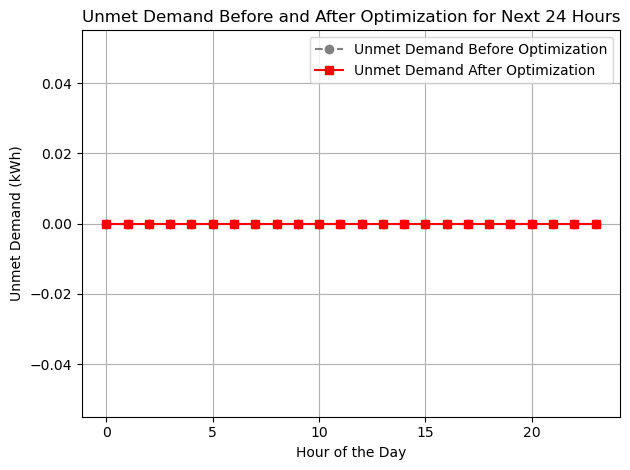


Financial Impact of Optimization: $5429.67
Environmental Impact of Optimization (Increase in Renewable Energy Used): 0.10 kWh


In [46]:
# Plot unmet demand before optimization
plt.plot(range(24), unmet_demand_before_optimization, linestyle='--', color='gray', marker='o', label='Unmet Demand Before Optimization')

# Plot unmet demand after optimization
plt.plot(range(24), unmet_demand_after_optimization, linestyle='-', color='red', marker='s', label='Unmet Demand After Optimization')

plt.xlabel('Hour of the Day')
plt.ylabel('Unmet Demand (kWh)')
plt.title('Unmet Demand Before and After Optimization for Next 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the comparison results
print("\nFinancial Impact of Optimization: ${:.2f}".format(revenue_after_optimization - revenue_before_optimization))
print("Environmental Impact of Optimization (Increase in Renewable Energy Used): {:.2f} kWh".format(environmental_impact))


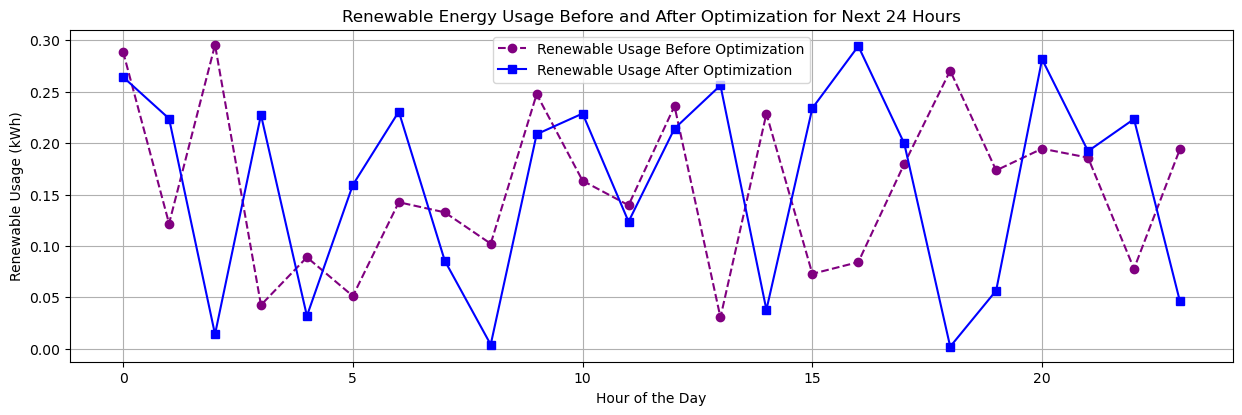

In [47]:
# Plot Renewable Energy Usage Before and After Optimization
plt.figure(figsize=(15, 25))
plt.subplot(5, 1, 2)
plt.plot(range(24), renewable_usage_before_optimization, label='Renewable Usage Before Optimization', color='purple', linestyle='--', marker='o')
plt.plot(range(24), renewable_usage_after, label='Renewable Usage After Optimization', color='blue', marker='s')
plt.xlabel('Hour of the Day')
plt.ylabel('Renewable Usage (kWh)')
plt.title('Renewable Energy Usage Before and After Optimization for Next 24 Hours')
plt.legend()
plt.grid(True)

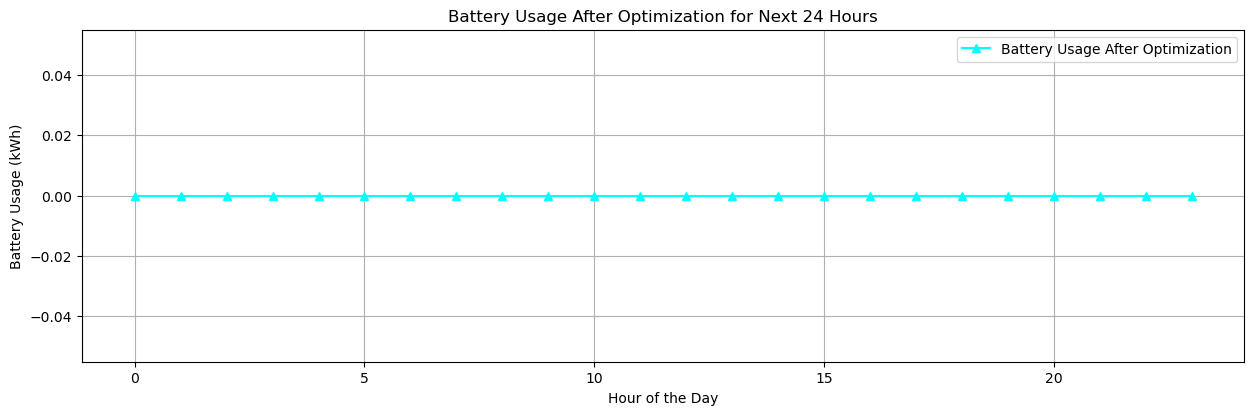

In [48]:
# Plot Battery Usage After Optimization
plt.figure(figsize=(15, 25))
plt.subplot(5, 1, 4)
plt.plot(range(24), battery_usage_after, label='Battery Usage After Optimization', color='cyan', marker='^')
plt.xlabel('Hour of the Day')
plt.ylabel('Battery Usage (kWh)')
plt.title('Battery Usage After Optimization for Next 24 Hours')
plt.legend()
plt.grid(True)

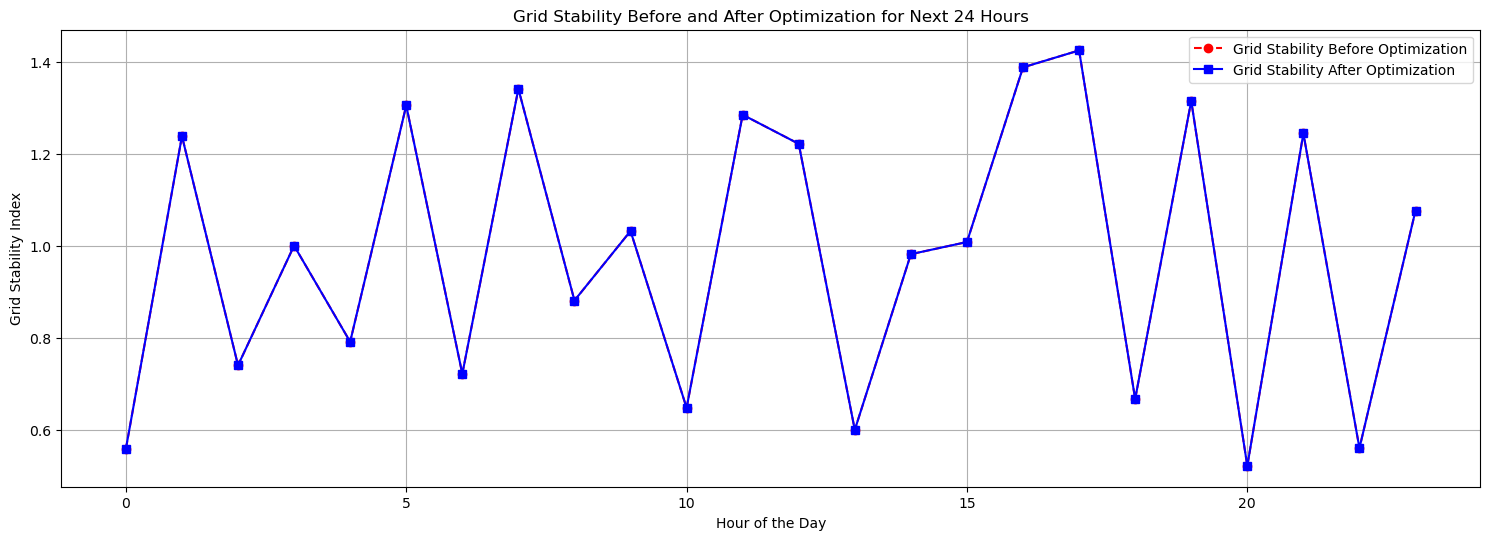

In [49]:
# Plot Grid Stability Index Before and After Optimization
plt.figure(figsize=(15, 25))
grid_stability_after_optimization = grid_stability_index_forecast_24h - (
    np.maximum(optimized_energy_allocation - renewable_usage_after - battery_usage_after, 0)
)

plt.subplot(5, 1, 5)
plt.plot(range(24), grid_stability_index_last_24h, label='Grid Stability Before Optimization', color='red', linestyle='--', marker='o')
plt.plot(range(24), grid_stability_after_optimization, label='Grid Stability After Optimization', color='blue', marker='s')
plt.xlabel('Hour of the Day')
plt.ylabel('Grid Stability Index')
plt.title('Grid Stability Before and After Optimization for Next 24 Hours')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()